In [7]:
import torch
import h5py
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from PIL import Image
from torchvision import transforms
from transformers import AutoImageProcessor

# product_id = 9898540
product_id = 22374851
# product_id = 76697077
# product_id = 24069034

### Extract images from HDF5

In [8]:
def extract_images(hdf5_file, product_id):

    # Abrimos el archivo HDF5 de imagenes
    with h5py.File(hdf5_file, 'r') as hdf5_file:
        product_id_str = str(product_id)
        if product_id_str not in hdf5_file:
            raise KeyError(f"PRODUCT_ID {product_id} not found in HDF5 file.")
        else:
            image_group = hdf5_file[product_id_str]
            images = []

            for dataset_name in image_group.keys():
                dataset = image_group[dataset_name]
                images.append(dataset[:])  # Append the dataset's data to the list

    return images

In [9]:
directory = Path("/home/azureuser/cloudfiles/code/Users/Fernando.Rodriguez/ainn-eliza-rnd-data/multimodal_dataloader_v1/data/brandbank_all_examples_all_groups/splits/brandbank_all_examples_all_groups_train")
hdf5_file = directory / "images.hdf5"

images = extract_images(hdf5_file, product_id)

### Apply image transformations

In [10]:
def apply_transformations(input_image, transformations, num_outcomes=3):
    transformed_images = []

    for _ in range(num_outcomes):
        image_tensor = transformations(input_image)
        image_array = image_tensor.permute(1, 2, 0).numpy()
        transformed_images.append(image_array)

    return transformed_images

def display_images(input_image, transformed_images):
    num_outcomes = len(transformed_images)
    fig, axes = plt.subplots(1, num_outcomes + 1, figsize=(4 * (num_outcomes + 1), 4))

    axes[0].imshow(input_image)
    axes[0].set_title("Original")

    for i in range(num_outcomes):
        axes[i + 1].imshow(transformed_images[i])
        axes[i + 1].set_title(f"Transformed {i + 1}")

    for ax in axes:
        ax.axis('off')

    plt.show()

In [11]:


model_name = "facebook/flava-full"

processor = AutoImageProcessor.from_pretrained(model_name)
image_mean = processor.image_mean
image_std = processor.image_std
size = processor.size[list(processor.size.keys())[0]]

random_rotate_180 = transforms.RandomApply(torch.nn.ModuleList([transforms.RandomRotation(degrees=(180, 180))]), p=0.1)

transformations = transform = transforms.Compose([
    # transforms.CenterCrop(size),
    transforms.RandomResizedCrop(size=size, scale=(0.4, 1.0)),
    transforms.RandomApply(torch.nn.ModuleList([transforms.RandomRotation(degrees=(180, 180))]), p=0.1),
    # transforms.RandomAutocontrast(),
    transforms.ToTensor(),
    # transforms.Normalize(mean=image_mean, std=image_std)
])

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


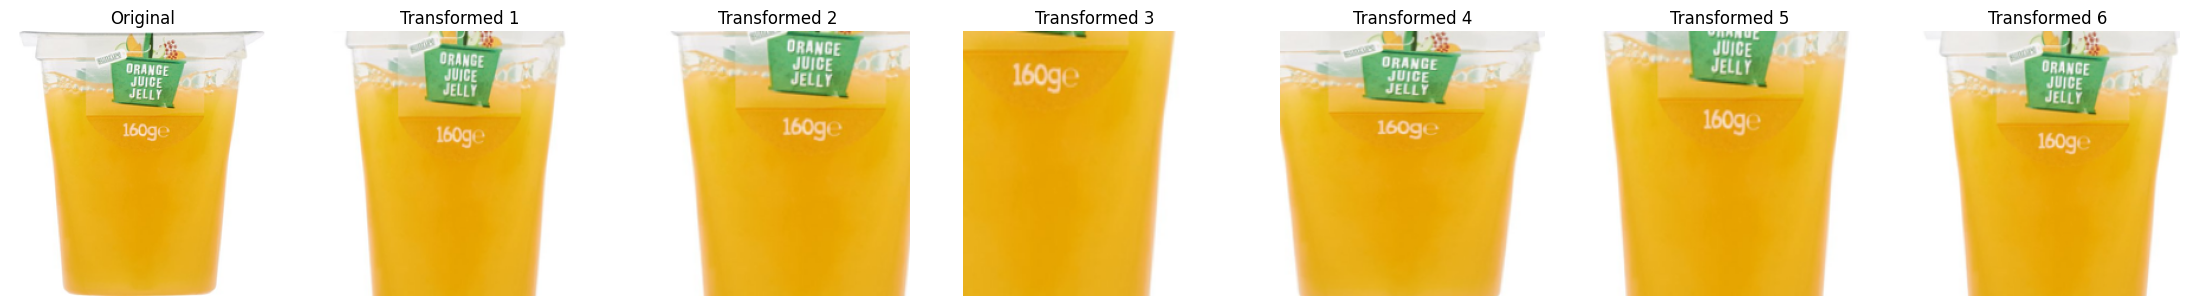

In [12]:
input_image_array = images[0]
input_image = Image.fromarray(input_image_array)
num_outcomes = 6

transformed_images = apply_transformations(input_image, transformations, num_outcomes)
display_images(input_image, transformed_images)